<a href="https://colab.research.google.com/github/Sabilgi/expert-potato/blob/main/Copy_of_Clustering_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hassan Elsabilgi

ID: 49-0619

Tutorial: T2

---

Name: Youssef ElKhawass

ID: 49-15428

Tutorial: T2

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [ ]:
df.describe(include='all')

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
unique,NaN,2973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,21st century classical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.833165,NaN,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,NaN,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,NaN,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,NaN,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,NaN,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,NaN,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000


Question 1: What are the 5 most popular music genres?

Visualization:

Text(0, 0.5, 'Genre')

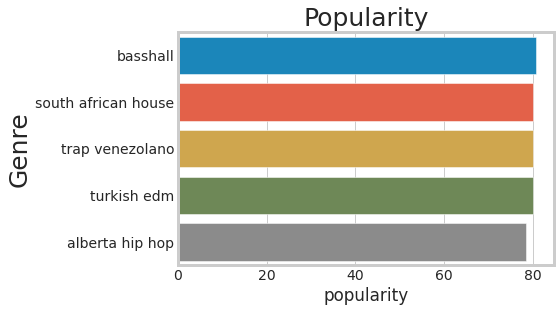

In [ ]:
ax = sns.barplot(x = 'popularity' , y = 'genres' , data = df.nlargest( n = 5 , columns = 'popularity'))
ax.set_title('Popularity' , size=25)
ax.set_ylabel('Genre',size = 25)

Q1 Answer: The 5 most popular music genres are Basshall, South African House, Trap Venezolano, Turkish EDM, and Alberta Hip Hop.

Question 2: What factors affect the Popularity of the song ? (Mention the biggest 2 factors, with interpretation)

---



Visualization:

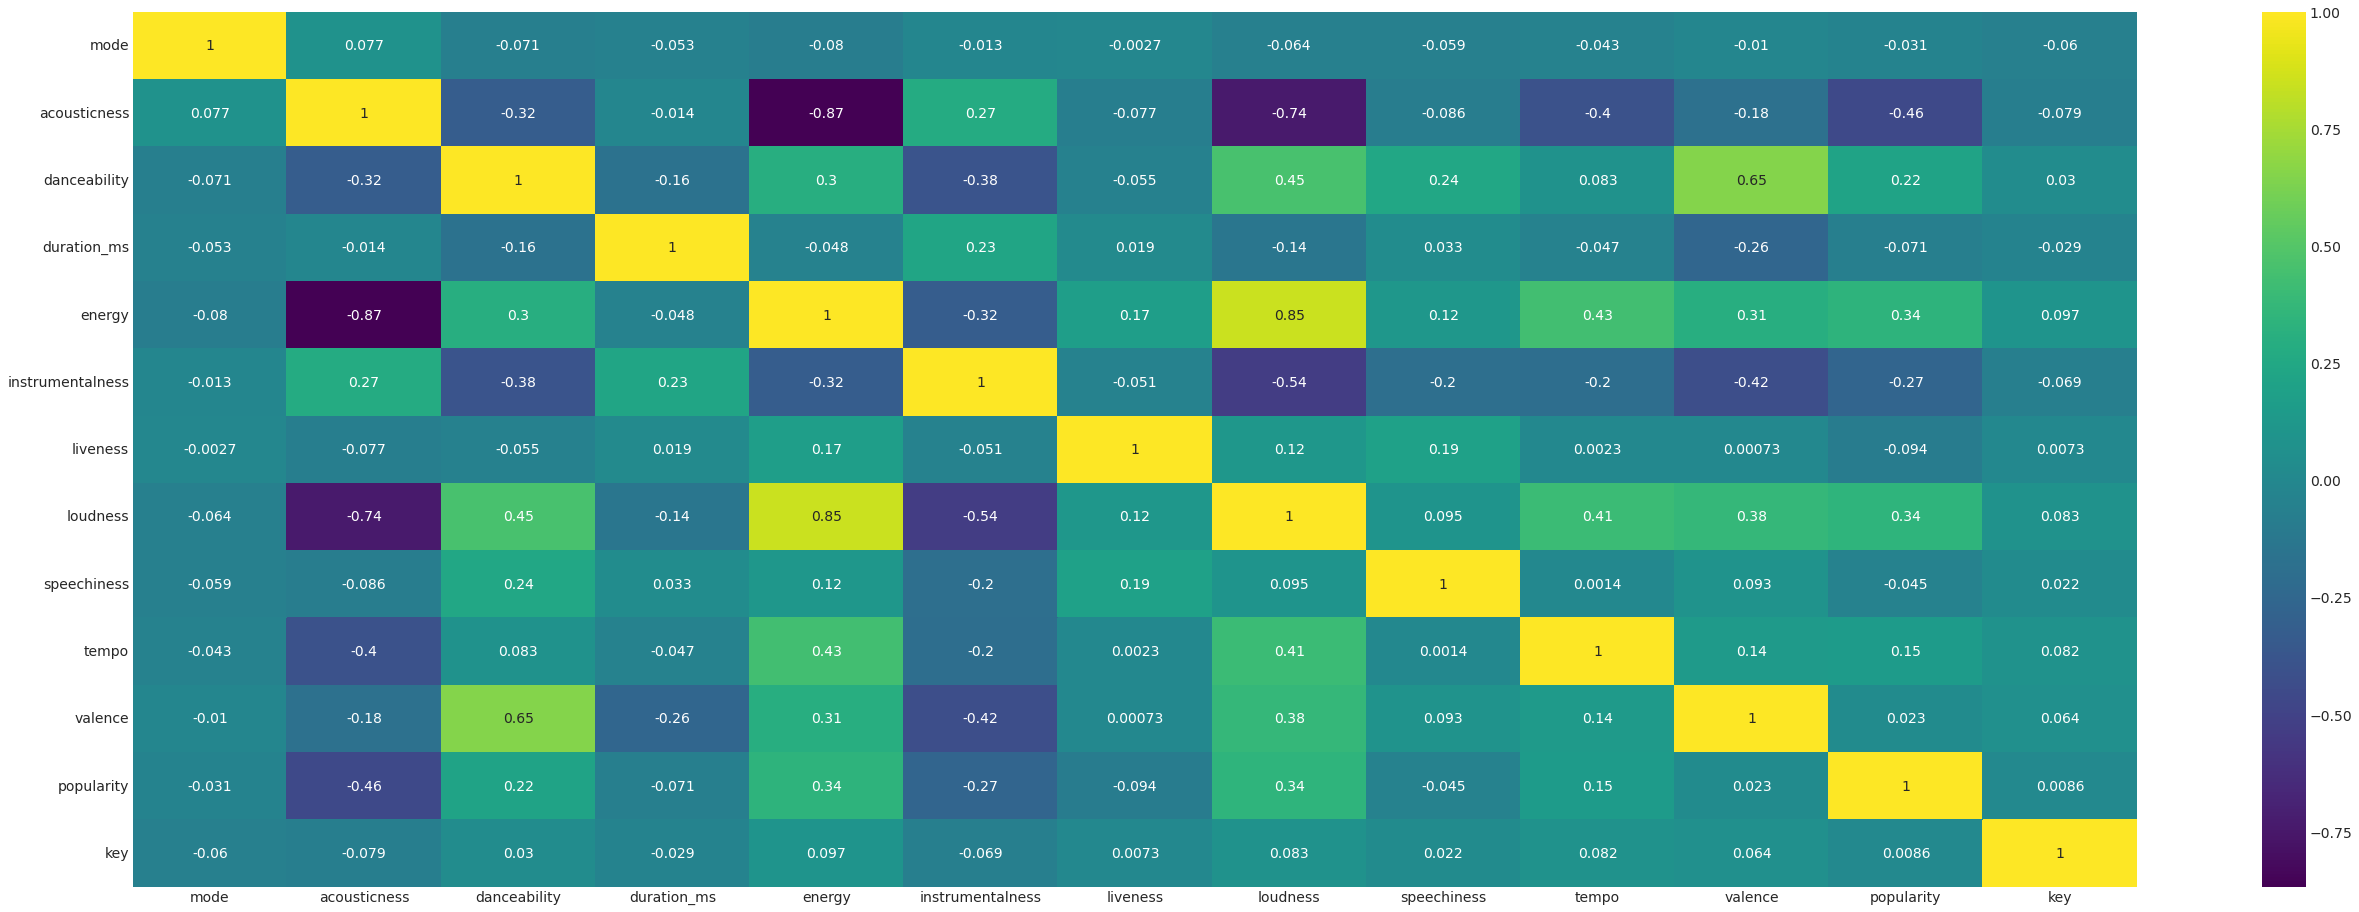

In [ ]:
corr = df.corr()
figure = plt.figure(figsize=(40,15))
sns.heatmap(corr, cmap='viridis', annot = True);

Q2 Answer: According to the Heatmap, the 2 biggest factors affecting the Popularity of the song are Energy & Loudness.

Question 3: Which genre has the highest energy and which has the lowest?

Visualization:

In [ ]:
sns.barplot(data=df, x= 'genres', y= 'energy')

ValueError: ignored

Q3: Answer: The genre with the highest Energy is Australian Ska, and the genre with the lowest is Binaural.

Question 4: What are the most correlated pairs of attributes ? (Mention 2 pairs, with interpretation)

Visualization:

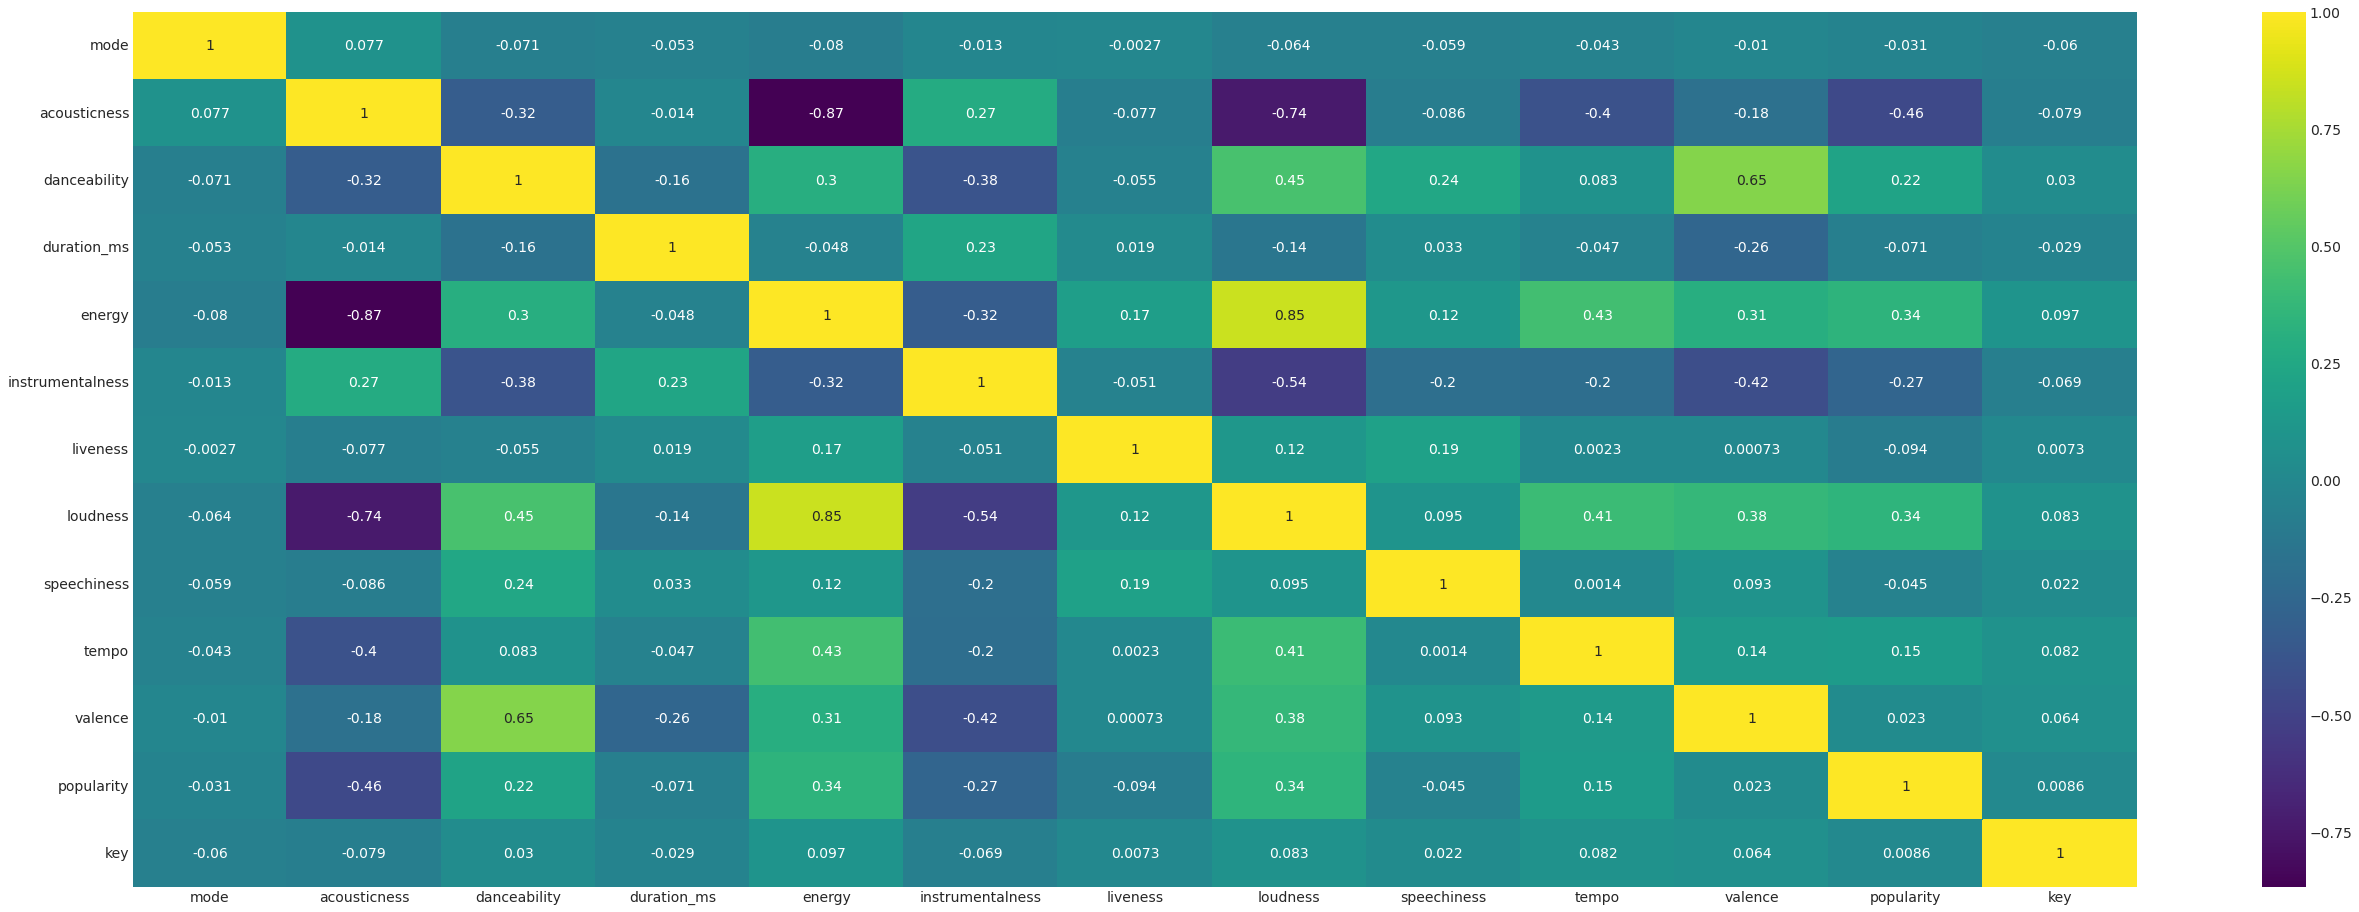

In [ ]:
corr = df.corr()
figure = plt.figure(figsize=(40,15))
sns.heatmap(corr, cmap='viridis', annot = True);

Q4 Answer: The 2 most correlated pairs of attributes are Loudness & Energy, as well as Valence & Danceabiity

# Data Inspection

In [ ]:
df.info()
df.describe(include='all')
df = df.drop(['genres'],axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


# interpretation

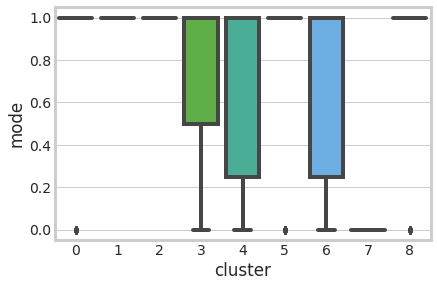

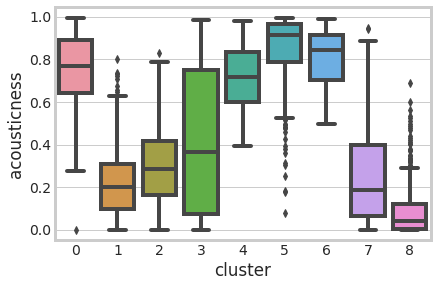

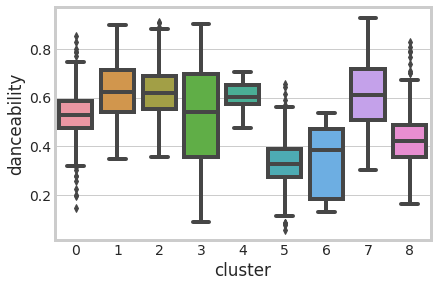

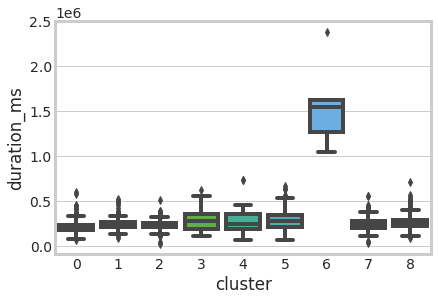

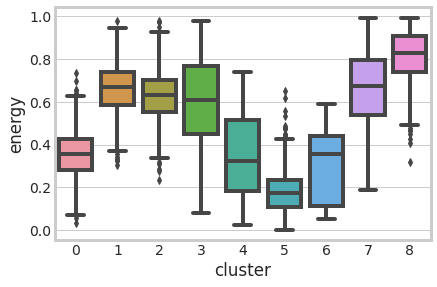

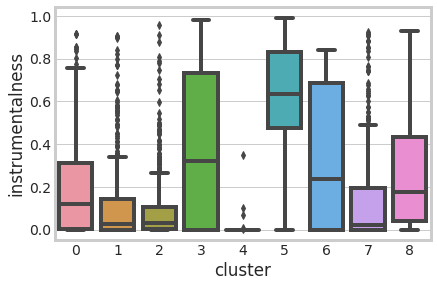

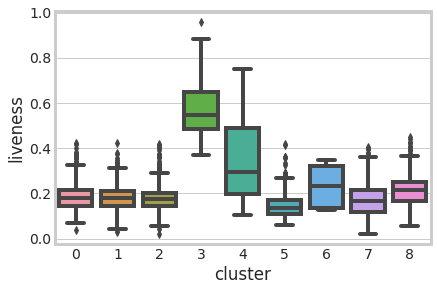

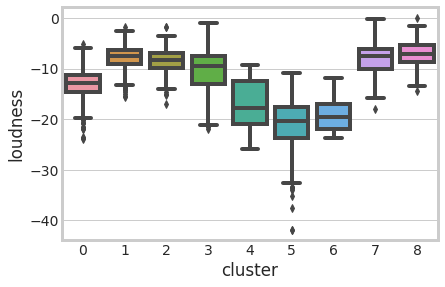

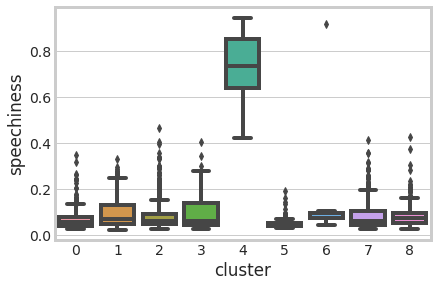

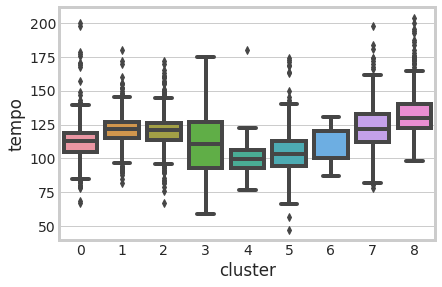

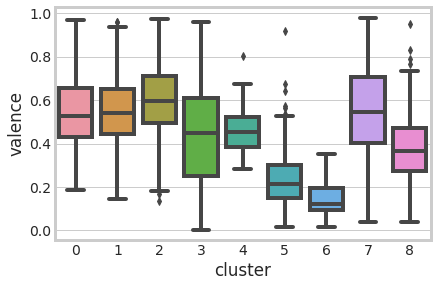

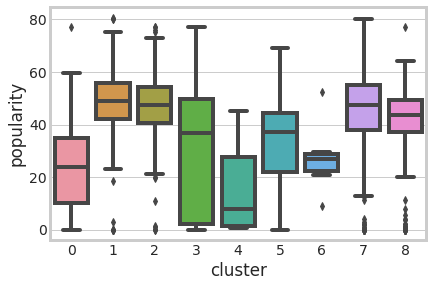

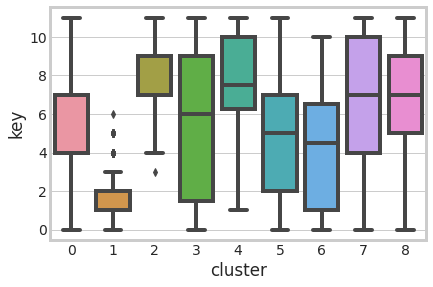

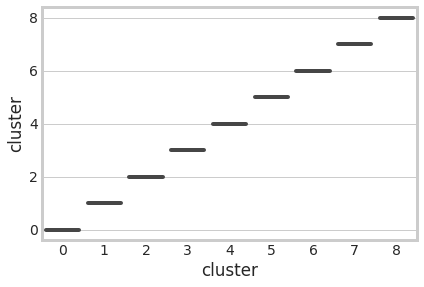

In [ ]:
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, data=df)

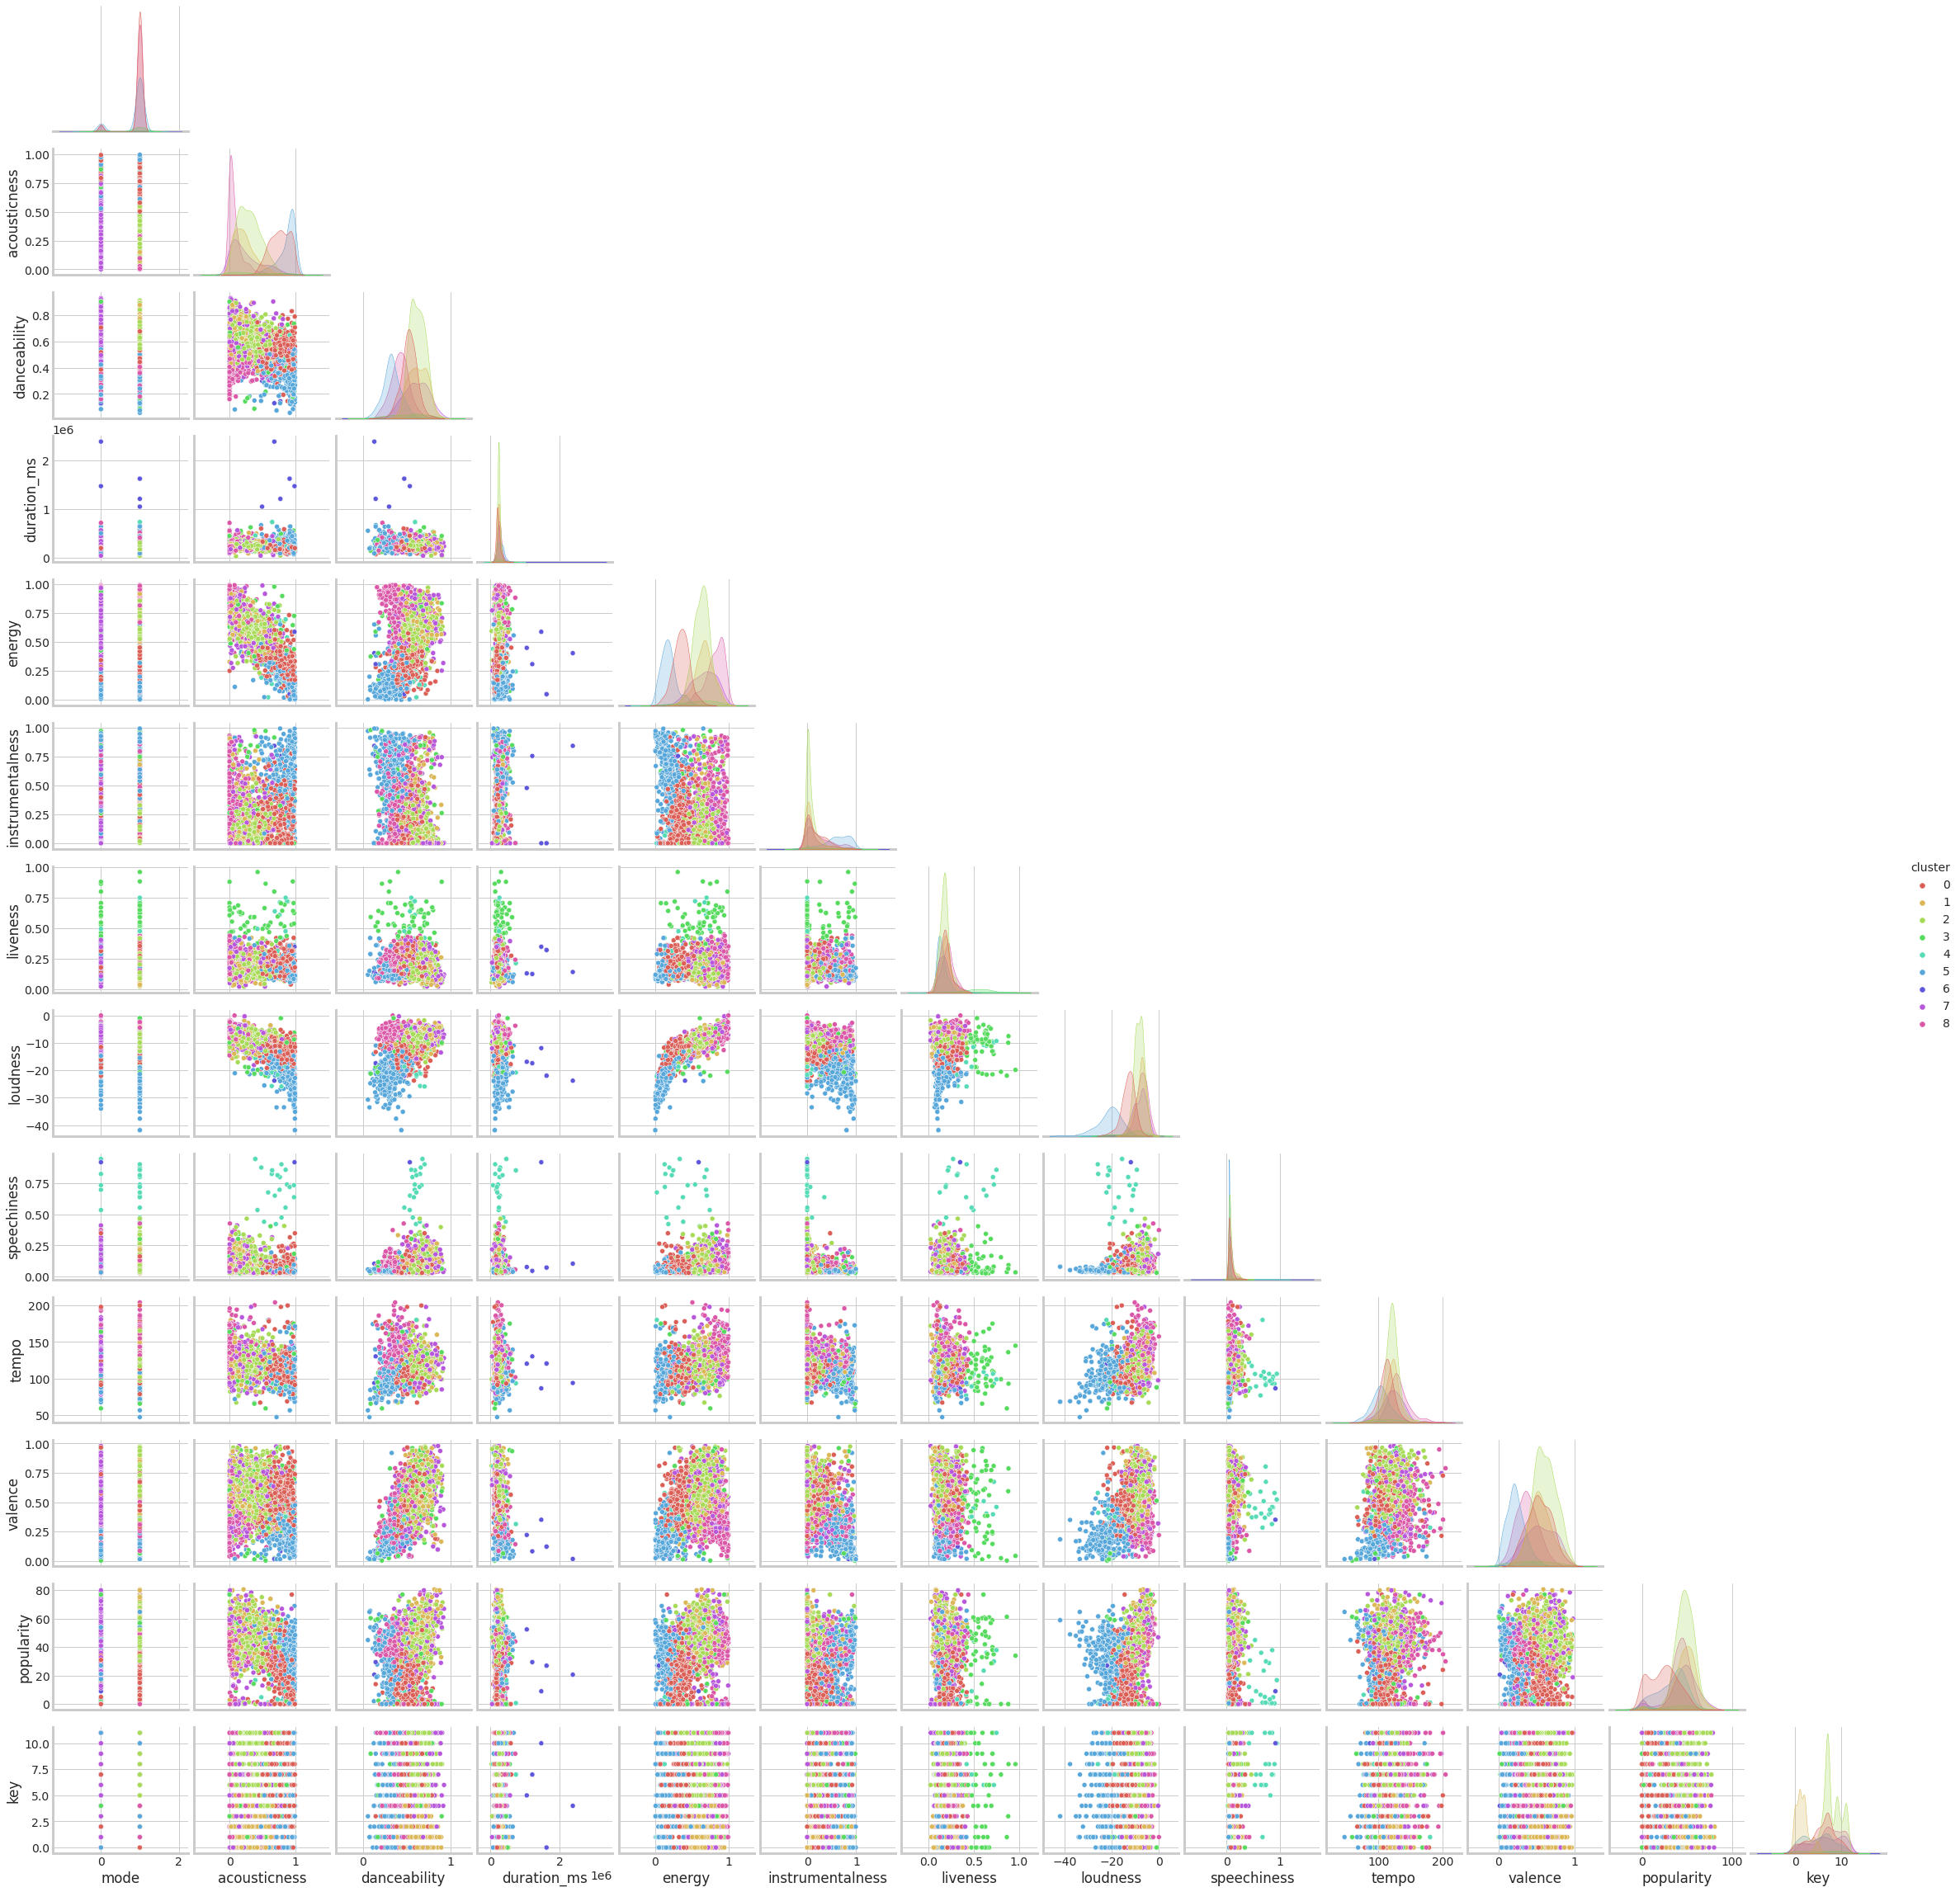

In [ ]:
sns.pairplot(df, hue='cluster', palette=sns.color_palette('hls', 9), corner=True)

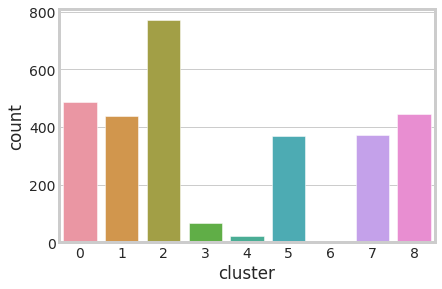

In [ ]:
sns.countplot(x='cluster', data=df)

ValueError: ignored

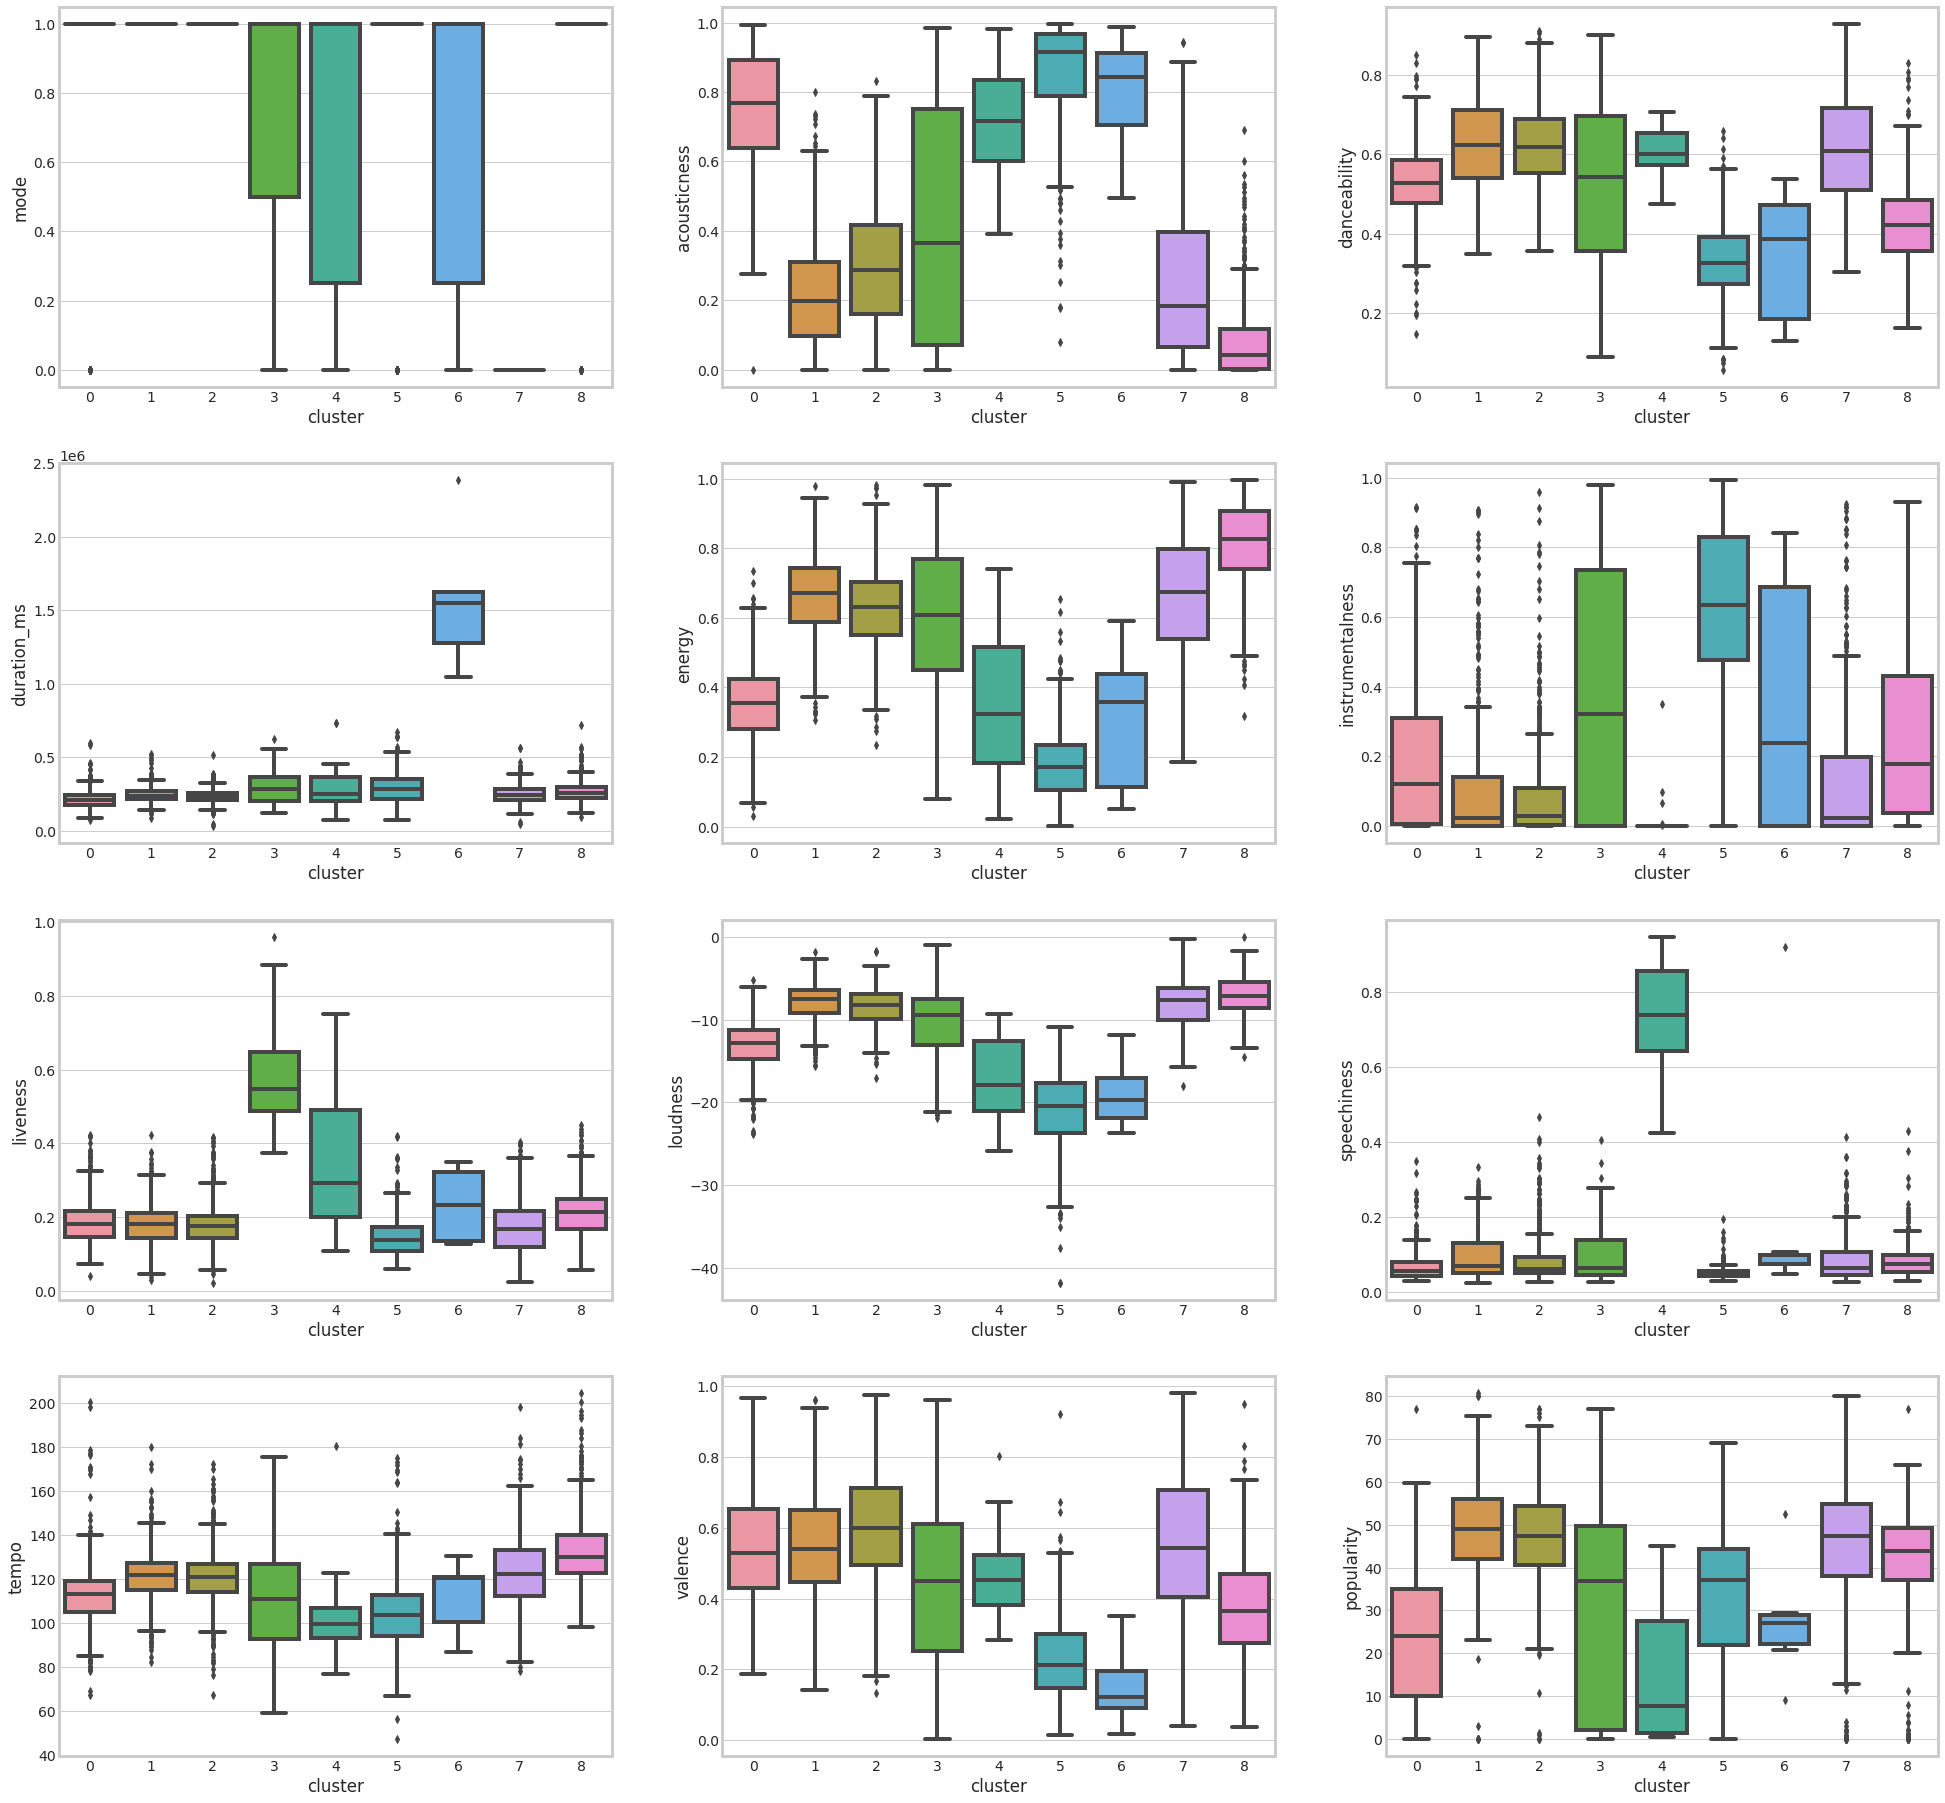

In [ ]:
cols = df.select_dtypes('number').columns.drop([ 'cluster'])
n = int(len(cols)**(1/2))

plt.figure(figsize=(30,30))
for i, col in enumerate(cols, 1):
    plt.subplot(n+1, n, i)
    sns.boxplot(x='cluster', y=col, data=df)

# clustering

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaled_data = StandardScaler().fit_transform(df)
scaled_data

array([[ 0.44748433,  1.80819676, -2.48471886, ..., -0.72171978,
         0.01817872,  0.53142973],
       [ 0.44748433,  0.29257799, -1.57893122, ...,  0.7512771 ,
        -0.27877364,  0.87737687],
       [ 0.44748433,  1.12840682,  1.16044852, ...,  0.4825547 ,
         0.31513108, -0.50641169],
       ...,
       [ 0.44748433, -0.43158249,  1.40532576, ...,  0.40293325,
        -0.27877364, -0.50641169],
       [-2.23471511,  1.85094428,  1.11840634, ..., -2.38381762,
         0.31513108, -1.19830597],
       [ 0.44748433,  0.0619243 ,  0.61218797, ..., -0.57669499,
         0.31513108, -0.50641169]])

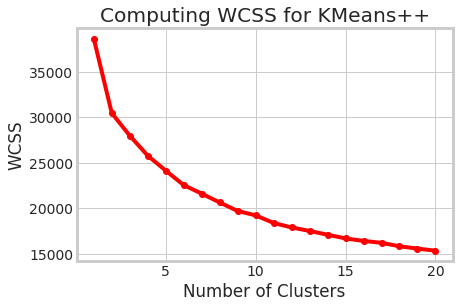

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range( 1, 21 ):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(scaled_data)
    wcss.append( kmeans.inertia_ )
    
plt.plot(range(1, 21), wcss, 'o-r', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)
df["cluster"] = cluster_labels